In [1]:
# Primeiro passo: Identificação da base de dados disponibilizada
# Organizar arquivos csv, removendo caracteres especiais e acentos.

In [36]:
# Segundo passo: importar bibliotecas para manibulaçãode tabelas e dados

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine # database connection
import datetime as dt
from IPython.display import display
import chart_studio.plotly as py # interactive graphing
import plotly.express as px
from plotly.graph_objs import Bar, Scatter, Marker, Layout 
import plotly.graph_objects as go

In [37]:
df = pd.read_csv('dados.csv', sep=',')


In [38]:
df

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,...,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,2,7941,2,3,1,0,0,34,769,346932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,1770,1,3,1,0,4,2,704,340148,...,S,N,N,S,N,S,S,N,N,N
2,8,709,1,3,4,0,11,30,1071,310713,...,S,N,S,S,S,S,S,S,N,N
3,13,9708,1,2,12,0,14,10,2028,341195,...,S,S,S,N,N,S,S,S,N,N
4,15,1363,1,2,8,0,11,12,805,332063,...,S,S,S,S,S,S,S,S,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48660,195918,3065,2,3,1,34184,0,280,3365,346359,...,S,S,S,S,S,S,S,S,N,S
48661,195924,12535,2,3,1,45048,0,4,1177,343882,...,N,N,N,N,N,N,N,N,N,N
48662,195930,2284,2,3,1,71020,0,5,3128,344252,...,N,N,N,N,N,N,N,N,N,N
48663,195934,2284,2,3,0,82940,0,2,3323,344421,...,S,N,S,N,S,S,S,S,N,N


In [39]:
# PARTE 1 # 
######################
#Faça uma exploração dos dados e mostre como a quantidade de leads varia de acordo
#com as outras variáveis (por exemplo, a marca ou o modelo afetam o recebimento de
#leads? O comportamento observado é o mesmo em todas as cidades?).
########################
# Demonstrando a variação das leads de acordo com cidade, marca, modelo, ano_modelo, quilometragem, preço
# No próprio excel foi separa a coluna uf_cidade, entre uma coluna apenas para as cidades e outra para os estados
# para que fosse possível identificar também a relação entre leads e o estado

df_var = df[['leads', 'cod_marca_veiculo', 'cod_modelo_veiculo', 'ano_modelo', 'uf', 'cidade', 'km_veiculo']]

#Verificando se o dataframe gerado possui valores nulos 
# caso não tenha prosseguir
df_var.isnull().values.any()
print(df_var)



       leads  cod_marca_veiculo  cod_modelo_veiculo  ano_modelo  uf  \
0          1                 34                 769        2018  GO   
1          1                  2                 704        1996  SP   
2          4                 30                1071        2002  SP   
3         12                 10                2028        1995  SP   
4          8                 12                 805        1995  SP   
...      ...                ...                 ...         ...  ..   
48660      1                280                3365        2016  SP   
48661      1                  4                1177        2013  RJ   
48662      1                  5                3128        2012  SP   
48663      0                  2                3323        2014  SP   
48664      0                 17                3338        2013  SP   

                cidade  km_veiculo  
0            Itumbiara           0  
1               Osasco      689815  
2            Sao Paulo       33700  

In [40]:
#Agrupando os dados, crieando um dataframe relacionando os atributos selecioandos e o úmero de leads

features = ['cod_marca_veiculo', 'cod_modelo_veiculo', 'ano_modelo', 'uf', 'cidade', 'km_veiculo']

dFs = {}

for name in features:

    dFs[name] =  df_var[[name, 'leads']].groupby(name).sum().reset_index()
    
    
#df_leads_city = df_var[['cidade', 'leads']].groupby('cidade').sum().reset_index()
#df_leads_uf = df_var[['uf', 'leads']].groupby('uf').sum().reset_index()
#df_leads_modelo = df_var[['cod_modelo_veiculo', 'leads']].groupby('cod_modelo_veiculo').sum().reset_index()
#df_leads_ano = df_var[['ano_modelo', 'leads']].groupby('ano_modelo').sum().reset_index()
#df_leads_km = df_var[['km_veiculo', 'leads']].groupby('km_veiculo').sum().reset_index()
#df_leads_marca = df_var[['cod_marca_veiculo', 'leads']].groupby('cod_marca_veiculo').sum().reset_index()



In [41]:
dFs

{'cod_marca_veiculo':     cod_marca_veiculo  leads
 0                  -1     24
 1                   2  26911
 2                   3  18537
 3                   4  19798
 4                   5  27213
 ..                ...    ...
 70                299      6
 71                304      1
 72                311      1
 73                313      0
 74                320      1
 
 [75 rows x 2 columns],
 'cod_modelo_veiculo':      cod_modelo_veiculo  leads
 0                    -1     24
 1                   643     12
 2                   645      0
 3                   646      1
 4                   650    793
 ..                  ...    ...
 651                3680      2
 652                3681      1
 653                3687      3
 654                3692      1
 655                3695      1
 
 [656 rows x 2 columns],
 'ano_modelo':     ano_modelo  leads
 0           -1     24
 1         1951      6
 2         1952      4
 3         1958      0
 4         1959      1
 ..     

In [42]:
# Para comparar os atributos escolhidos com o número de leads é preciso utilizar g´raficos diferentes para cada um deles
# Para o número de leads por estado foi escolhido um gráfico em formato de donuts
# Para ano e quilometragem um gráfico de linhas

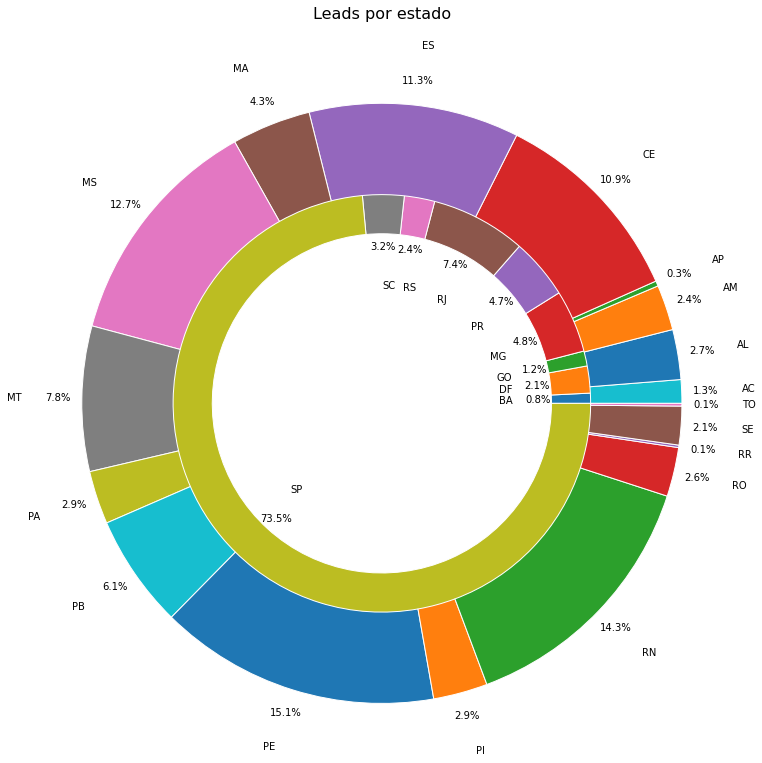

In [43]:
# Esse plot exemplifica a porcentagem total de leads por estado
# É facilmente identificado que São Paulo é o estado com a maior parcela de leads, em seguita temos Rio Grande do Norte,
# Pernambuco e Mato Grosso do Sul

mask = (dFs['uf']['leads'] > 1500)
df_inner = dFs['uf'].loc[mask]
df_outer = dFs['uf'].loc[~mask]
fig, ax = plt.subplots(figsize=(24,12))
size = 0.35

ax.pie(df_inner['leads'].values.flatten(), radius=1,
       labels=df_inner['uf'],
       pctdistance=0.6, labeldistance=0.45,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(df_outer['leads'].values.flatten(), radius=1.5-size, 
       labels = df_outer['uf'],
       autopct='%1.1f%%',
       pctdistance=1.08, labeldistance=1.2,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Porcentagem de Leads por estado')
plt.title('Leads por estado', y=1.08, fontsize=16)
plt.show()

                    cidade  leads
800              Sao Paulo  88717
709         Rio de Janeiro  11020
165               Campinas   7407
98          Belo Horizonte   5721
759  Sao Bernardo do Campo   5248
259               Curitiba   5012
748            Santo Andre   4485
126               Brasilia   4297
785  Sao Jose do Rio Preto   3501
576                 Osasco   3115
342              Guarulhos   2969
691         Ribeirao Preto   2613
761     Sao Caetano do Sul   2302
786    Sao Jose dos Campos   2044
656           Porto Alegre   1772
456                Jundiai   1624
319                Goiania   1467
91                 Barueri   1415
829               Sorocaba   1343
756                 Santos   1322


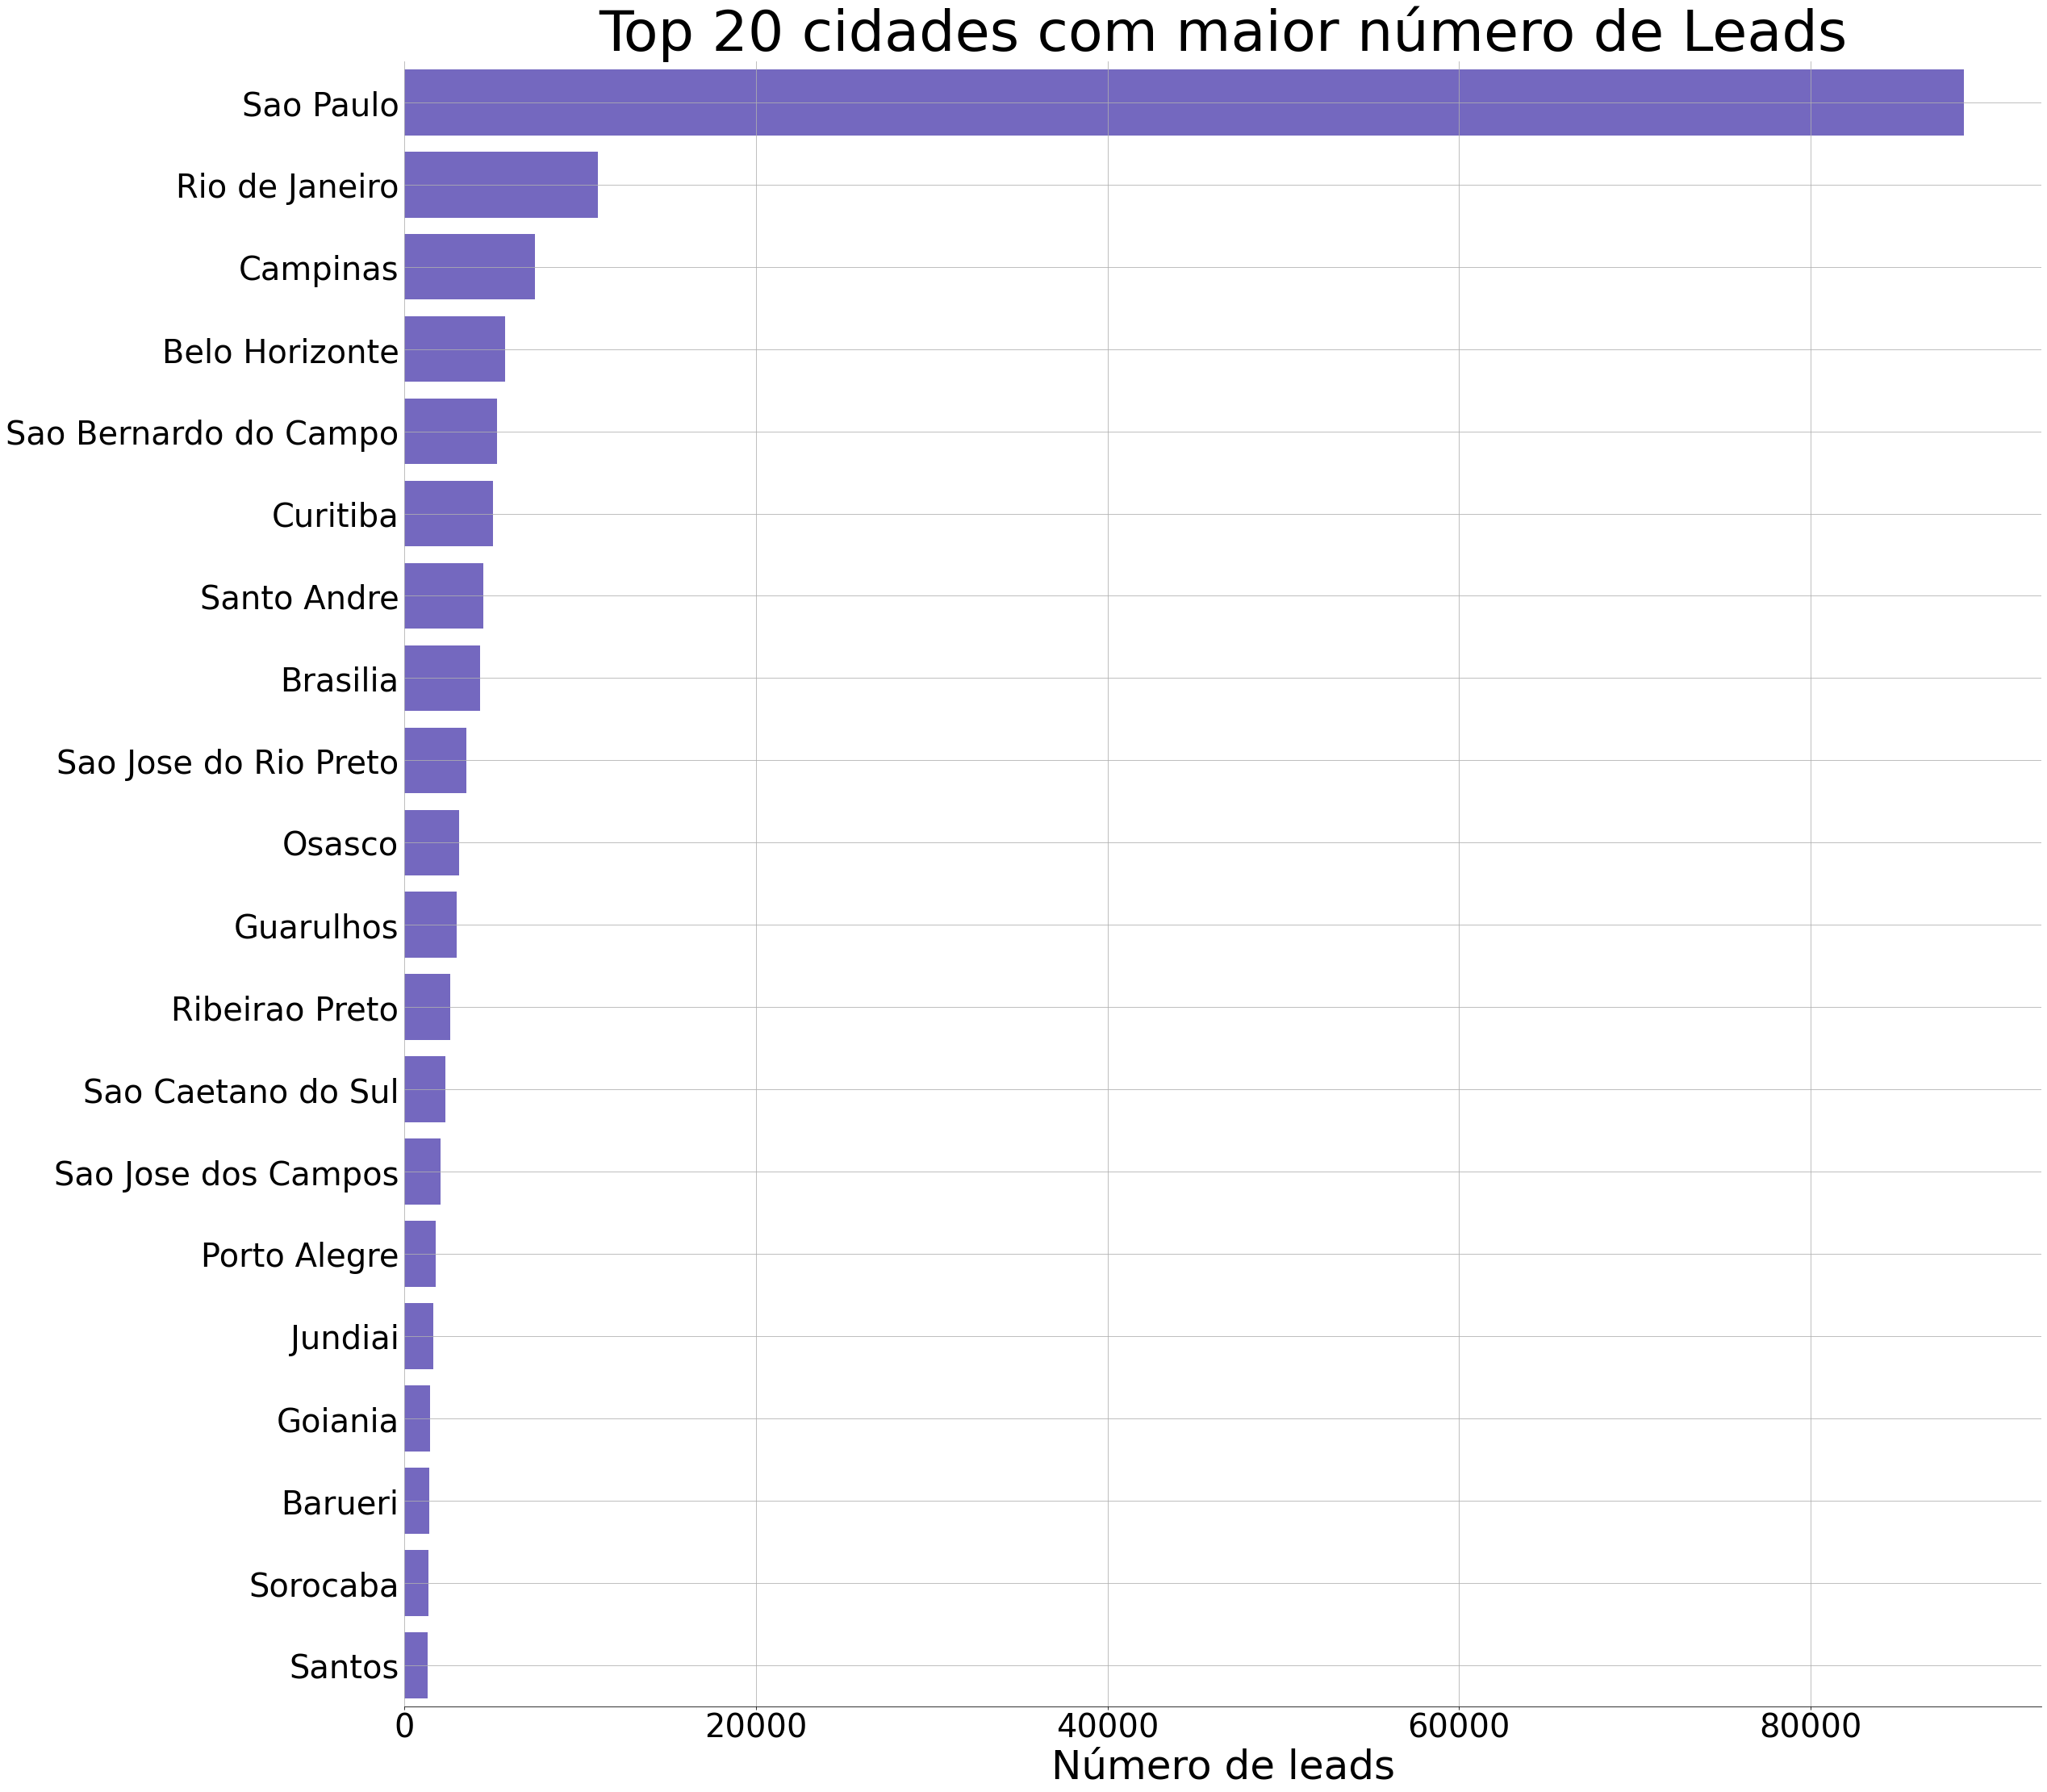

In [44]:
# Criando um gráfico de barras com agrupamento em x, onde em y temos as quantidades de leads
# Para criar o plot, utiliza-se a biblioteca seaborn em conjunto com matplotlib
# Como o número de cidades é muito alto, optei aqui por selecionar as cidades com os números de
# leads mais significativos (Em torno de 20 cidades). Essa também foi a razão por ter separado por estados anteriormente.

df_cidade = dFs['cidade'].nlargest(20, 'leads')
print(df_cidade)

fig, ax = plt.subplots(figsize=(30,30))
fig.tight_layout(pad=5)

ax = sns.barplot(y='cidade', x='leads', data=df_cidade,
                 color='slateblue', ci=False)

plt.title("Top 20 cidades com maior número de Leads",
          fontsize=70)
plt.xlabel('Número de leads', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel(None)
plt.yticks(fontsize=40)
sns.despine(left=True)
ax.grid(True)
ax.tick_params(bottom=True, left=False)

'''
#barplot
plt.figure(figsize=(10, 30))
plt.gca()
# Definindo x e y e criando o barplot
sns.barplot(x="cidade", y="leads",  data=df_cidade)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Cidades',fontsize=15, labelpad = 10)
plt.yticks(fontsize=10)

plt.grid()
'''
plt.show()

#Com esse plot é possível observarmos que a cidade de São Paulo possui o maior número de leads, em seguida
# Rio de Janeiro, Campinas e Belo Horizonte. Entre as 20 cidades, temos como maioria cidades do estado de São Paulo 
# como esperado de acordo com o gráfico anterior

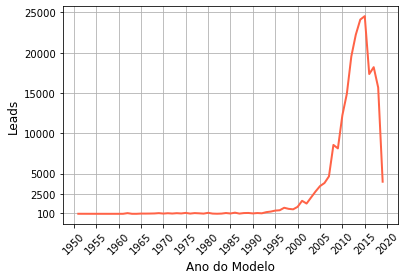

In [45]:
# Veremos agora qual a influência do ano de fabricação dos veículos e o número de leads, por meio de um gráfico de linha
# Aqui está sendo removido do dataframe de ano_modelo os anos com valores iguais a -1
mask = (dFs['ano_modelo']['ano_modelo'] < 1)
df_ano = dFs['ano_modelo'].loc[~mask]

#plotando o gráfico

plt.plot(df_ano['ano_modelo'], df_ano['leads'],linestyle = '-', color='tomato', lw=2)
plt.ylabel('Leads', fontsize=12)
plt.xlabel('Ano do Modelo', fontsize=12)
plt.yticks([100,2500,5000,10000,15000, 20000,25000])
plt.xticks([1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020], rotation=45)
plt.grid()
plt.show()

#Com esse gráfico é possível concluir que modelos mais novos recebem mais procura de compra compara do os modelos fabricado antes
# antes de 2010 e que a masio taxa de procura está entre os anos de 2010 e 2017

14798


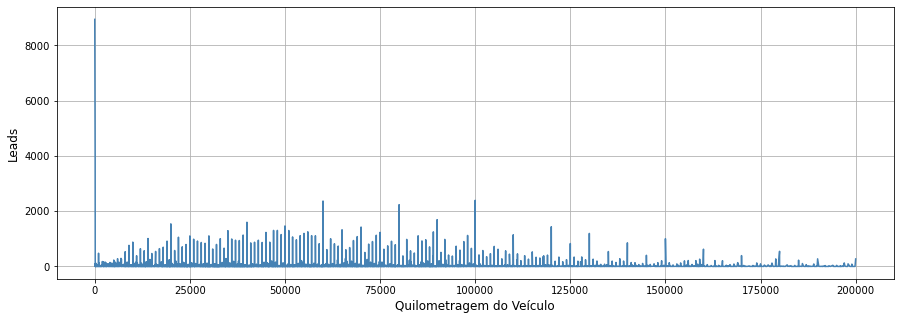

In [46]:
# Veremos agora qual a influência da quilometragem dos veículos e o número de leads, por meio de um scatterplot
# Aqui está sendo removido do dataframe de ano_modelo os anos com valores iguais a -1
mask = (dFs['km_veiculo']['km_veiculo'] < 0)
df_km = dFs['km_veiculo'].loc[~mask]
# Aqui serão removidos alguns valores de quilometragem que não existem, e que estão presentes no banco de dados
#por exemplo: 2147483647, 99999999, 200000000
#serão considerados modelos com até 200mil km de rodagem
mask = (dFs['km_veiculo']['km_veiculo']> 200000)
df_km= dFs['km_veiculo'].loc[~mask]

print(len(df_km))
#plotando o gráfico
plt.subplots(figsize=(15, 5))
plt.plot(df_km['km_veiculo'], df_km['leads'], color='steelblue')
plt.ylabel('Leads', fontsize=12)
plt.xlabel('Quilometragem do Veículo', fontsize=12)

plt.grid()
plt.show()


# Os carros com sem quilometragem possuem maior numero de leads do que os outros, podemos então vizualizar
# que apartir dos 100 mil quilometros rodados o número de leads cai. A maior concentração de leads está entre os 25000 e 75000
#quilômetros.

In [47]:
df_var

,leads,cod_marca_veiculo,cod_modelo_veiculo,ano_modelo,uf,cidade,km_veiculo
0,1,34,769,2018,GO,Itumbiara,0
1,1,2,704,1996,SP,Osasco,689815
2,4,30,1071,2002,SP,Sao Paulo,33700
3,12,10,2028,1995,SP,Sao Paulo,105000
4,8,12,805,1995,SP,Sao Paulo,71240
...,...,...,...,...,...,...,...
48660,1,280,3365,2016,SP,Jau,35000
48661,1,4,1177,2013,RJ,Duque de Caxias,91222
48662,1,5,3128,2012,SP,Jundiai,120000
48663,0,2,3323,2014,SP,Jundiai,40000


In [48]:


# A ideia aqui é realizar uma análise de correlação entre os atributos selecionados e o atributo alvo. 
# Para essa análise serão utilizadas apenas os atributos compostos por variáveis discretas (km, leads, marca, modelo).
# As variáveis qualitativas (ano, uf, cidade) não serão utilizadas
mask = (df_var['km_veiculo'] < 0)
df_var = df_var.loc[~mask]
# Aqui serão removidos alguns valores de quilometragem que não existem, e que estão presentes no banco de dados
#por exemplo: 2147483647, 99999999, 200000000
#serão considerados modelos com até 200mil km de rodagem
mask = (df_var['km_veiculo']> 200000)
df_var= df_var.loc[~mask]

mask = (df_var['cod_marca_veiculo']< 1)
df_var= df_var.loc[~mask]

mask = (df_var['cod_modelo_veiculo']< 1)
df_var= df_var.loc[~mask]

#correlação com as variaveis quantitaitvas  selecionadas
df_corr = pd.DataFrame(df_var, columns = ['leads', 'cod_marca_veiculo' ,'cod_modelo_veiculo', 'km_veiculo'])
df_corr.corr()
#correlação da base de dados completa
df.corr()
#correlação entre os atributos selecionados
df_var.corr()

# Os resultados a respeito da correlação não nos diz muito, devido os indices serem muito baixos

,leads,cod_marca_veiculo,cod_modelo_veiculo,ano_modelo,km_veiculo
leads,1.000000,0.040614,-0.009712,-0.067083,0.004377
cod_marca_veiculo,0.040614,1.000000,0.223300,0.070387,-0.103641
cod_modelo_veiculo,-0.009712,0.223300,1.000000,0.263420,-0.228841
ano_modelo,-0.067083,0.070387,0.263420,1.000000,-0.494766
km_veiculo,0.004377,-0.103641,-0.228841,-0.494766,1.000000


In [49]:
# A idéia aqui é selecionar as cidades do estado de são paulo e analisar se existe 
#um relação entre ano do modelo e as cidades 
df = pd.read_csv('dados.csv', sep=',')
mask = (df['leads']< -1)
df= df.loc[~mask]

# primeiro passo é remover todos os anuncios que não são do estado de são paulo
mask = (df['uf'] != 'SP')
df_sp = df.loc[~mask]

df_sp = df_sp[['leads', 'cidade', 'ano_modelo']]



In [50]:
#segundo passo agrupar por cidades e anos
group = df_sp.groupby(["cidade", "ano_modelo"])
df_groups = group.count()

df_groups = pd.DataFrame(df_groups, columns = [ "leads"])
df_groups['cidade'] = df_groups.index.get_level_values(level=0)

df_groups['ano_modelo'] = df_groups.index.get_level_values(level=1)
#salvando dataframe em csv
df_groups.to_csv('df_groups.csv',  header=True, index=True, decimal='.')



In [51]:
df_groups

leads       cidade  ano_modelo
cidade      ano_modelo                                
Adamantina  2007            2   Adamantina        2007
            2008            1   Adamantina        2008
            2011            2   Adamantina        2011
            2012            1   Adamantina        2012
            2014            1   Adamantina        2014
...                       ...          ...         ...
Votuporanga 2013            9  Votuporanga        2013
            2014           10  Votuporanga        2014
            2015           11  Votuporanga        2015
            2016            4  Votuporanga        2016
            2017            3  Votuporanga        2017

[2186 rows x 3 columns]

In [123]:
# Ultimo passo: esse gráfito interativo mostra como se comportam o número de leads em realção ao ano dos modelos e
#as cidades do estado de são paulo


fig = px.bar(df_groups, x="cidade", y="ano_modelo", color="ano_modelo", text="leads", barmode='stack', hover_name="cidade")
fig.update_coloraxes(cmax=2020, cmin=1950, colorbar_title=' Ano do Modelo')
fig.update_layout(barmode='stack', yaxis=dict(
        title='Leads',
        titlefont_size=16,
        tickfont_size=14,
    ), xaxis=dict(
        title='Cidades',
        titlefont_size=16,
        tickfont_size=8,
    ))
fig.show()

# Esse plot nos mostra na maioria das cidades do estado de sp a procura por veiculos fabricados após 2010 é relativamente 
#maior que par aos veículos mais antigos. Temos também sendo as cidades com mais procura, santos, campinas e são paulo. As
# cidades que possuem o maior número de leads,mostram uma maior variedade em relação ao número de leads e ano de fabricação dos veículos.